### Passo 1: forncer um conjunto de dados de preços histórico dos ativos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tickers = ['MULT3.SA','SBSP3.SA','BRML3.SA','IGTA3.SA','HGTX3.SA','SANB3.SA','CSAN3.SA','PETR3.SA','JHSF3.SA','FHER3.SA']

In [3]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  10 of 10 completed


In [4]:
#Preço diário de fechamento do mercado
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
Date,,,,,,,,,,
2021-08-12,9.71,23.950001,16.73,38.490002,37.750000,7.24,22.559999,27.844053,19.450001,34.450001
2021-08-13,9.60,23.590000,15.45,40.570000,37.580002,7.14,22.480000,28.278822,19.639999,33.590000
2021-08-16,9.49,23.070000,14.80,38.880001,36.610001,6.86,22.090000,27.740089,19.639999,33.980000
2021-08-17,9.24,22.790001,13.96,38.450001,35.730000,6.52,21.590000,27.750000,19.469999,32.849998
2021-08-18,9.26,22.299999,14.96,38.160000,35.730000,6.68,21.320000,27.420000,19.290001,31.690001


In [5]:
prices

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,8.127082e+06,NaN,NaN,NaN,3.376896,-9907.129883,4.963095
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.187376,-8826.350586,4.668845
2000-01-05,NaN,NaN,NaN,7.501922e+06,NaN,NaN,NaN,3.230448,-8826.350586,4.538919
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.204605,-9528.854492,4.516162
2000-01-07,NaN,NaN,NaN,8.127082e+06,NaN,NaN,NaN,3.230448,-9905.329102,4.579669
...,...,...,...,...,...,...,...,...,...,...
2021-08-12,9.71,23.950001,16.73,3.849000e+01,37.750000,7.24,22.559999,27.844053,19.450001,34.450001
2021-08-13,9.60,23.590000,15.45,4.057000e+01,37.580002,7.14,22.480000,28.278822,19.639999,33.590000
2021-08-16,9.49,23.070000,14.80,3.888000e+01,36.610001,6.86,22.090000,27.740089,19.639999,33.980000


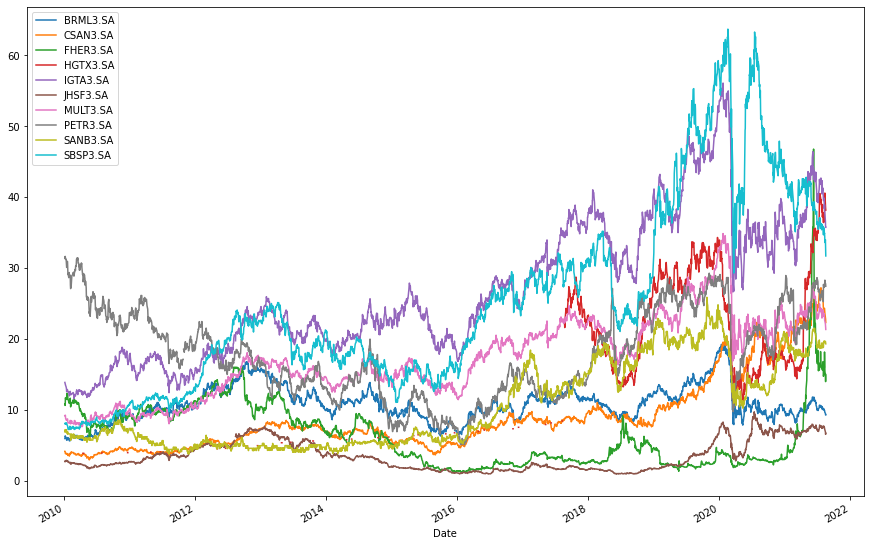

In [10]:
prices[prices.index >= "2010-01-01"].plot(figsize=(15,10));

### Passo 2: Estimando os retornos esperados

In [11]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [19]:
# Retorno Esperado
from pypfopt.expected_returns import mean_historical_return
mu= mean_historical_return(prices)
mu

BRML3.SA    0.055257
CSAN3.SA    0.139264
FHER3.SA   -0.006856
HGTX3.SA   -0.435079
IGTA3.SA    0.074400
JHSF3.SA    0.014854
MULT3.SA    0.091577
PETR3.SA    0.102392
SANB3.SA         NaN
SBSP3.SA    0.090128
dtype: float64

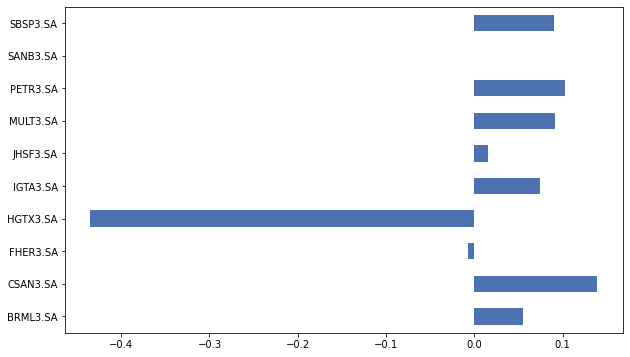

In [25]:
mu.plot.barh(figsize=(10,6));

In [36]:
from pypfopt import expected_returns

mu1 = expected_returns.capm_return(prices)
mu1

BRML3.SA    0.159805
CSAN3.SA    0.136556
FHER3.SA    0.165536
HGTX3.SA    0.228366
IGTA3.SA    0.124251
JHSF3.SA    0.158470
MULT3.SA    0.136663
PETR3.SA    0.139956
SANB3.SA    0.158140
SBSP3.SA    0.120938
Name: mkt, dtype: float64

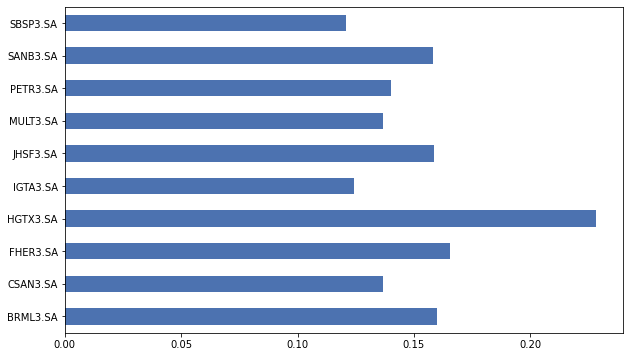

In [24]:
mu1.plot.barh(figsize=(10,6));

### Estimando a matriz de covariância

In [12]:
# Esta é a matriz de covariância
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,BRML3.SA,CSAN3.SA,FHER3.SA,HGTX3.SA,IGTA3.SA,JHSF3.SA,MULT3.SA,PETR3.SA,SANB3.SA,SBSP3.SA
BRML3.SA,0.201732,0.071475,0.052222,0.061255,0.088996,0.088183,0.101523,0.093742,0.058847,0.072927
CSAN3.SA,0.071475,0.187651,0.054796,0.038843,0.050555,0.068053,0.068068,0.089683,0.047102,0.058789
FHER3.SA,0.052222,0.054796,0.479625,0.042300,0.039828,0.066790,0.046553,0.066022,0.031191,0.047413
HGTX3.SA,0.061255,0.038843,0.042300,0.553047,0.047904,0.050788,0.052389,0.033282,0.020664,0.032276
IGTA3.SA,0.088996,0.050555,0.039828,0.047904,0.127024,0.067614,0.084354,0.066184,0.045198,0.048559
JHSF3.SA,0.088183,0.068053,0.066790,0.050788,0.067614,0.273063,0.073832,0.082189,0.048642,0.063153
MULT3.SA,0.101523,0.068068,0.046553,0.052389,0.084354,0.073832,0.144864,0.076515,0.037646,0.057052
PETR3.SA,0.093742,0.089683,0.066022,0.033282,0.066184,0.082189,0.076515,0.192879,0.053899,0.070502
SANB3.SA,0.058847,0.047102,0.031191,0.020664,0.045198,0.048642,0.037646,0.053899,0.437474,0.033106
SBSP3.SA,0.072927,0.058789,0.047413,0.032276,0.048559,0.063153,0.057052,0.070502,0.033106,0.158106


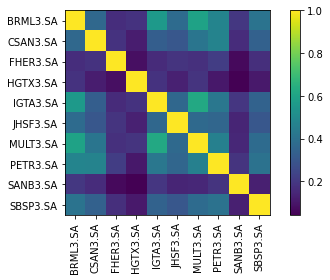

In [20]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

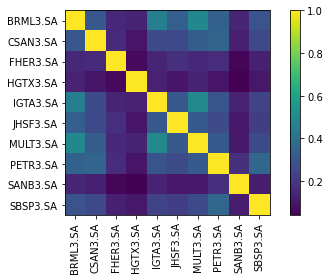

In [21]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

### Passo 3: A carteira que maximiza o Índice de Sharpe

In [42]:
# PESOS de cada Ativo
from pypfopt import EfficientFrontier

ef = EfficientFrontier (mu1,S)
weights = ef.max_sharpe()
weights

OrderedDict([('BRML3.SA', 0.1345898584007433),
             ('CSAN3.SA', 0.1167026267483402),
             ('FHER3.SA', 0.1132368917621584),
             ('HGTX3.SA', 0.1171330374644312),
             ('IGTA3.SA', 0.1076870293581285),
             ('JHSF3.SA', 0.1212050471950303),
             ('MULT3.SA', 0.1361051903484052),
             ('PETR3.SA', 0.0192311906118382),
             ('SANB3.SA', 0.0784419663550259),
             ('SBSP3.SA', 0.0556671617558989)])

In [34]:
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.txt")  # saves to file
cleaned_weights

OrderedDict([('BRML3.SA', 0.13459),
             ('CSAN3.SA', 0.1167),
             ('FHER3.SA', 0.11324),
             ('HGTX3.SA', 0.11713),
             ('IGTA3.SA', 0.10769),
             ('JHSF3.SA', 0.12121),
             ('MULT3.SA', 0.13611),
             ('PETR3.SA', 0.01923),
             ('SANB3.SA', 0.07844),
             ('SBSP3.SA', 0.05567)])

### O desempenho esperado desse portfólio é:

In [33]:
cleaned_weights

OrderedDict([('BRML3.SA', 0.13459),
             ('CSAN3.SA', 0.1167),
             ('FHER3.SA', 0.11324),
             ('HGTX3.SA', 0.11713),
             ('IGTA3.SA', 0.10769),
             ('JHSF3.SA', 0.12121),
             ('MULT3.SA', 0.13611),
             ('PETR3.SA', 0.01923),
             ('SANB3.SA', 0.07844),
             ('SBSP3.SA', 0.05567)])

In [35]:
ef.portfolio_performance(verbose=True)

Expected annual return: 15.6%
Annual volatility: 23.8%
Sharpe Ratio: 0.57


(0.15595531170682816, 0.23815818186411108, 0.5708613940645629)

#### Índice de Sharpe é um indicador que mede o retorno excedente de uma aplicação financeira em relação a outra aplicação livre de risco. "Quanto maior o Índice de Sharpe em determinado Investimento, melhor é o seu 'Retorno' por 'Unidade de Risco', por outras palavras, melhor é a Qualidade com que esse Retorno foi obtido, ou melhor a Qualidade do Risco visto por outro prisma.”

## A demonstração da Teoria do Portfólio é isto, mostrar o retorno esperado, a matriz de covariância e finaliza apresentando os pesos indicados para cada ativo, para determinado retorno esperado.

### Bem, aqui foi usado o modelo de retorno do CAPM, que "prevê que o retorno esperado ao se investir numa ação é igual ao retorno da taxa livre de risco acrescido do prêmio de risco (Rm-Rf). Se o retorno esperado não for igual ou maior ao retorno requerido, então o investimento não vale a pena ser feito".
## E se fosse usado outro modelo de retorno?

In [44]:
from pypfopt import CLA, plotting

cla = CLA(mu1, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 15.4%
Annual volatility: 23.5%
Sharpe Ratio: 0.57


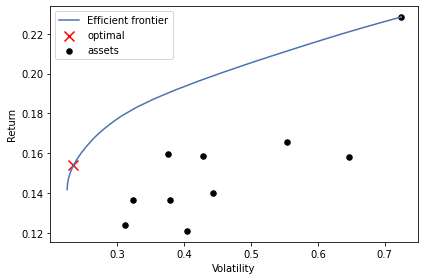

In [45]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)